# Neural Network Assignment- Gas Turbine

In [1]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
Gas_Turbine = pd.read_csv("gas_turbines.csv")

In [3]:
Gas_Turbine.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
Gas_Turbine.shape

(15039, 11)

In [5]:
Gas_Turbine.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

# There is not any null value in a dataset

In [6]:
Gas_Turbine.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [7]:
Gas_Turbine.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [8]:
Gas_Turbine.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


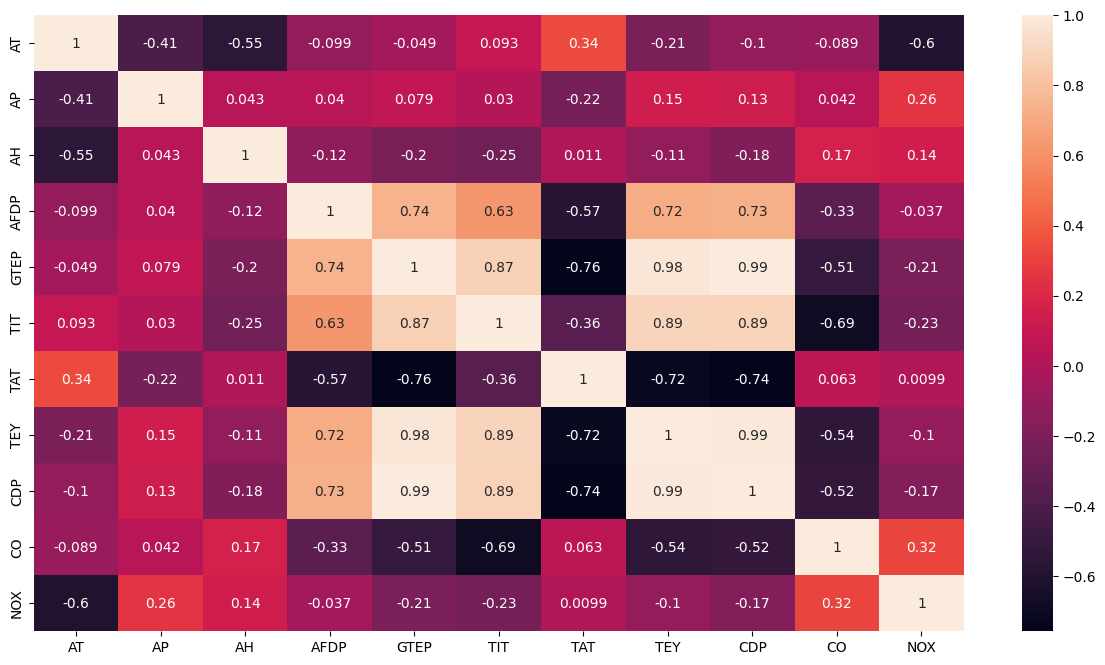

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(Gas_Turbine.corr(),annot=True)
plt.show()

# Splitting a data into features and target

In [10]:
X = Gas_Turbine.drop("TEY", axis=1)
y = Gas_Turbine[["TEY"]]

In [11]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [12]:
y

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15034,111.61
15035,111.78
15036,110.19
15037,110.74


# Scaling a data using Standard Scaler

In [13]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [14]:
Scaler.fit_transform(X)

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [16]:
X_train.shape, y_train.shape

((12031, 10), (12031, 1))

In [17]:
X_test.shape, y_test.shape

((3008, 10), (3008, 1))

# Model Evaluation

# Tensorflow is an important library used in Neural Network

In [18]:
!pip install tensorflow

In [19]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Layer, Lambda

In [20]:
model = Sequential()
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=40, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))

In [21]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

# Optimizers are used to avoid Vanishing/Exploding gradient in back propagation

# For training data

In [22]:
model.fit(X_train,y_train, epochs=15)

Epoch 1/15
376/376 [==============================] - 2s 2ms/step - loss: 18246.0391 - mse: 18246.0391
Epoch 2/15
376/376 [==============================] - 1s 2ms/step - loss: 18246.0371 - mse: 18246.0371
Epoch 3/15
376/376 [==============================] - 1s 2ms/step - loss: 18246.0254 - mse: 18246.0254
Epoch 4/15
376/376 [==============================] - 1s 2ms/step - loss: 18246.0234 - mse: 18246.0234
Epoch 5/15
376/376 [==============================] - 1s 2ms/step - loss: 18246.0312 - mse: 18246.0312
Epoch 6/15
376/376 [==============================] - 1s 1ms/step - loss: 18246.0332 - mse: 18246.0332
Epoch 7/15
376/376 [==============================] - 1s 1ms/step - loss: 18246.0332 - mse: 18246.0332
Epoch 8/15
376/376 [==============================] - 1s 2ms/step - loss: 18246.0312 - mse: 18246.0312
Epoch 9/15
376/376 [==============================] - 1s 2ms/step - loss: 18246.0312 - mse: 18246.0312
Epoch 10/15
376/376 [==============================] - 1s 2ms/step - loss

# For testing data

In [23]:
model.fit(X_test,y_test, epochs=15)

Epoch 1/15
94/94 [==============================] - 1s 3ms/step - loss: 18167.2852 - mse: 18167.2852
Epoch 2/15
94/94 [==============================] - 0s 3ms/step - loss: 18167.2773 - mse: 18167.2773
Epoch 3/15
94/94 [==============================] - 0s 2ms/step - loss: 18167.2754 - mse: 18167.2754
Epoch 4/15
94/94 [==============================] - 0s 2ms/step - loss: 18167.2812 - mse: 18167.2812
Epoch 5/15
94/94 [==============================] - 0s 2ms/step - loss: 18167.2812 - mse: 18167.2812
Epoch 6/15
94/94 [==============================] - 0s 2ms/step - loss: 18167.2773 - mse: 18167.2773
Epoch 7/15
94/94 [==============================] - 0s 2ms/step - loss: 18167.2773 - mse: 18167.2773
Epoch 8/15
94/94 [==============================] - 0s 2ms/step - loss: 18167.2793 - mse: 18167.2793
Epoch 9/15
94/94 [==============================] - 0s 2ms/step - loss: 18167.2773 - mse: 18167.2773
Epoch 10/15
94/94 [==============================] - 0s 2ms/step - loss: 18167.2812 - mse: 